In [116]:
library(tidyverse)

In [135]:

# https://www.rdocumentation.org/packages/outliers/versions/0.14/topics/grubbs.test

# The theory:  https://www.statisticshowto.datasciencecentral.com/grubbs-test/


## Grubbs Test

> Grubbs Test for determining an outlier

In [118]:
# help(grubbs.test)  < you really really want to see this, it helps

In [119]:
# grubbs.test(x, type = 10, opposite = FALSE, two.sided = FALSE)

```
The function can perform three tests given and discussed by Grubbs(1950).

First test (10) is used to detect if the sample dataset contains one 
outlier, statistically different than the other values. Test is based by calculating score of this outlier G:
(outlier minus mean and divided by sd) 

and comparing it to appropriate critical values.  

Alternative method is calculating ratio of variances of two datasets 
- full dataset and dataset without outlier. The obtained value called U is bound with G by simple formula.

Second test (11) is used to check if lowest and highest value are two outliers on opposite tails of sample. It is based on calculation of ratio of range to standard deviation of the sample.

Third test (20) calculates ratio of variance of full sample and sample without two extreme observations. It is used to detect if dataset contains two outliers on the same tail.

The p-values are calculated using qgrubbs function.
```

In [120]:
# help(grubbs.test) <<< use this ! 

In [121]:

x <- c(6.98,8.49,7.97,6.64,
       8.80,8.48,5.94,6.94,
       6.89,7.47,7.32,4.02)

print(x)

# note: alpha will be 0.05 for all this 


 [1] 6.98 8.49 7.97 6.64 8.80 8.48 5.94 6.94 6.89 7.47 7.32 4.02


In [122]:

mean(x)

sd(x)


[1] 7.161667

[1] 1.305609

In [123]:

# install.packages("outliers", dependencies = T)

library(outliers)


In [127]:

outlier(x)

# so what this is doing is calculating like a Grubbs like approach the 
# 'estimate of what the outlier is', based on math...

# Finds value with largest difference between it and sample mean, 
# which can be an outlier.



[1] 4.02

In [42]:

# (a) null hpy = 'there are no outliers in the dataset'
# this is inherently a two-tail test
# based on hypothesis tests of course...

grubbs.test(x,two.sided = T)



	Grubbs test for one outlier

data:  x
G = 2.40630, U = 0.42576, p-value = 0.05159
alternative hypothesis: lowest value 4.02 is an outlier


In [44]:

# (b) one tail test, null is 'lowest val is not an outlier'

grubbs.test(x)



	Grubbs test for one outlier

data:  x
G = 2.40630, U = 0.42576, p-value = 0.0258
alternative hypothesis: lowest value 4.02 is an outlier


In [45]:

grubbs.test(x,type=10) # i.e. the default 



	Grubbs test for one outlier

data:  x
G = 2.40630, U = 0.42576, p-value = 0.0258
alternative hypothesis: lowest value 4.02 is an outlier


In [46]:

# will check upper tail as well

grubbs.test(x,type=10, opposite = T) 



	Grubbs test for one outlier

data:  x
G = 1.25480, U = 0.84384, p-value = 1
alternative hypothesis: highest value 8.8 is an outlier


In [48]:

# type 11:  test for two outliers on opp tails.

# are the min and max outliers (joint test so to speak)

grubbs.test(x, type=11) 

# we fail to reject the null hypothesis here, see the p ? 



	Grubbs test for two opposite outliers

data:  x
G = 3.66110, U = 0.31842, p-value = 0.1806
alternative hypothesis: 4.02 and 8.8 are outliers


In [50]:

# two outliers in one tail ? 

# thus 2 0 its not 20  :) 

grubbs.test(x,type=20) 

# reject the null hypothesis

# imp:  one tail procedure, you compare to 0.05, NOT 0.05/2 ! 



	Grubbs test for two outliers

data:  x
U = 0.29249, p-value = 0.04528
alternative hypothesis: lowest values 4.02 , 5.94 are outliers


In [53]:

grubbs.test(x,type=20, opposite = T) 

# fail to reject the null hyp, they are not outliers, see the p ? 

# or better:  not enough evidence to say they are outliers ...



	Grubbs test for two outliers

data:  x
U = 0.71581, p-value = 0.911
alternative hypothesis: highest values 8.49 , 8.8 are outliers


In [30]:

# null:  there are no outliers (specifics here) 

grubbs.test(x,type=20, two.sided = TRUE)



	Grubbs test for two outliers

data:  x
U = 0.29249, p-value = 0.09056
alternative hypothesis: lowest values 4.02 , 5.94 are outliers


In [67]:

# READ:

# it is very important that you understand when it says this:
# 'alternative hypothesis: highest values 8.49 , 8.8 are outliers'
#    it is really saying:  the alt hyp is equal to the words
#    it is NOT saying as a final calc/output that they ARE outliers ! ! ! ! 


## Another Test 

In [54]:
set.seed(1234)
x = rnorm(10)
grubbs.test(x)
grubbs.test(x,type=20)
grubbs.test(x,type=11)


	Grubbs test for one outlier

data:  x
G = 1.97080, U = 0.52047, p-value = 0.1323
alternative hypothesis: lowest value -2.34569770262935 is an outlier



	Grubbs test for two outliers

data:  x
U = 0.3836, p-value = 0.2459
alternative hypothesis: lowest values -2.34569770262935 , -1.20706574938542 are outliers



	Grubbs test for two opposite outliers

data:  x
G = 3.44460, U = 0.32364, p-value = 0.195
alternative hypothesis: -2.34569770262935 and 1.08444117668306 are outliers


In [55]:
# should the outlier be rejected with 95% confidence ???

In [57]:
# G_calc:  (X_under_consideration - Mean) / SD

## Math

In [68]:

print(x)


 [1] 6.98 8.49 7.97 6.64 8.80 8.48 5.94 6.94 6.89 7.47 7.32 4.02


In [69]:

mean(x)

sd(x)


[1] 7.161667

[1] 1.305609

In [70]:

grubbs.test(x)



	Grubbs test for one outlier

data:  x
G = 2.40630, U = 0.42576, p-value = 0.0258
alternative hypothesis: lowest value 4.02 is an outlier


In [ ]:

# The datapoint that was tested was 4.02 (the lowest value)

# p-val = .0258, which is less than .05, so we reject the null

# the point tested is either going to be the min or max value in the df, 
# WHICHEVER is furthest from the mean !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# p-val:
# Really close to 0 means:  STRONG EVIDENCE of an outlier
# Closer towards 1 means :  WEAK EVIDENCE of an outlier ! 


In [76]:

x

which.max(x)  # where are you max ???

which.min(x)  # where are you min ???

# i.e. searching for locations or index ! 

# this is R, we start with index=1 :)


[1] 6.98 8.49 7.97 6.64 8.80 8.48 5.94 6.94 6.89 7.47 7.32 4.02

[1] 5

[1] 12

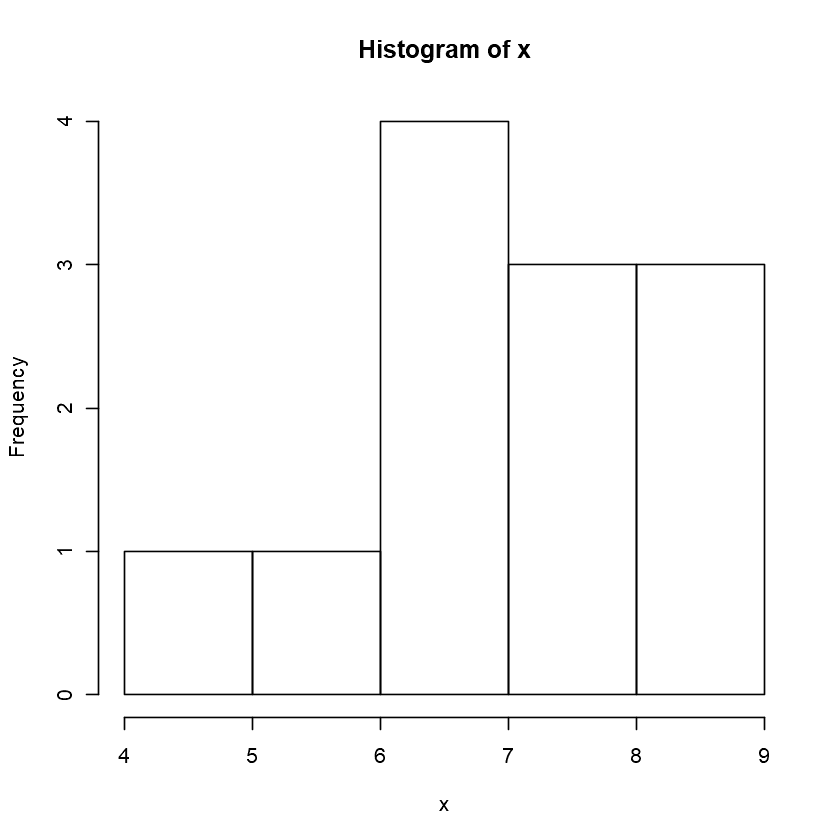

In [77]:

hist(x)

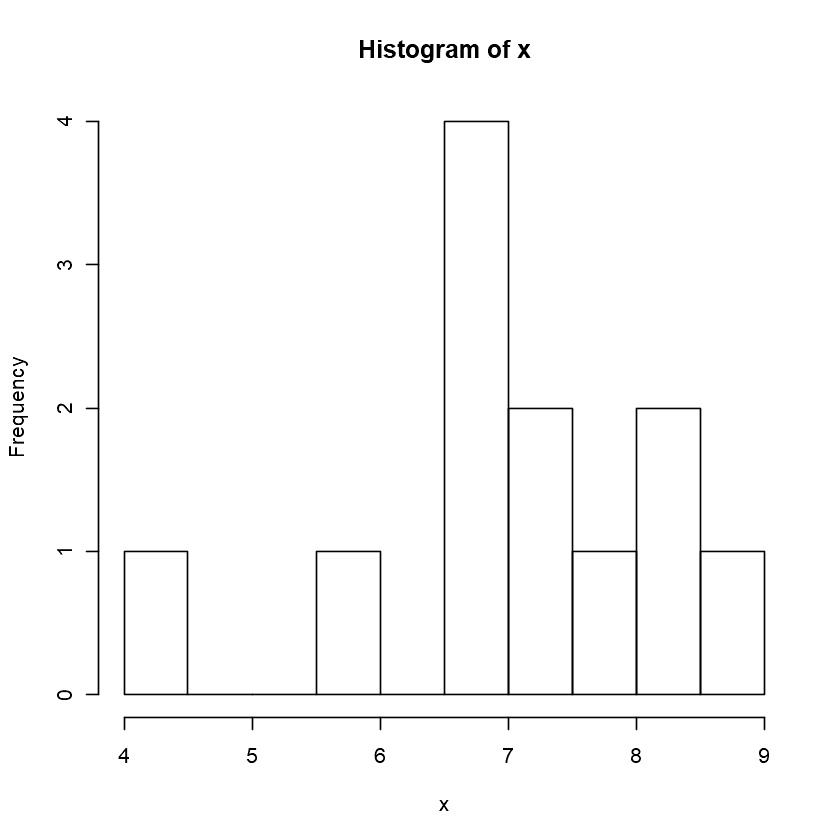

In [86]:
hist(x,breaks=7) # see an approx L ? 

In [130]:

# Manually doing what the test did for me automatically:

# Left-tailed test, mathematically: 

N <- 12      # i have 12 testpoints 

G_testpoint <- 4.02   #  value min i'm checking 

mean_data <- mean(x)

sd_data <- sd(x)

G_test <- (mean_data - G_testpoint)/sd_data
# THIS WILL BE 'G' IN THE GRUBBS.TEST OUTPUT ! ! ! ! ! 
#  - technically i would consider this to be: G_test, and G_critical is what we compare it to

G_test


# Compare your G test statistic to the G critical value:
# Gtest < Gcritical: keep the point in the data set; it is not an outlier.
# Gtest > Gcritical: reject the point as an outlier.

[1] 2.406284

In [131]:

grubbs.test(x)



	Grubbs test for one outlier

data:  x
G = 2.40630, U = 0.42576, p-value = 0.0258
alternative hypothesis: lowest value 4.02 is an outlier


In [132]:

#  See the G = 2.40630 ?  Same value i calculated, and is the G_test value !

#  It does not show G_critical, it just shows you output p-value. 


In [133]:

# Manually calculate the p-score now ! 

qgrubbs(n = 12, p = 0.05)


[1] 1.379054

In [101]:

qgrubbs(p=0.05, n=12, type=10, rev = FALSE)


[1] 1.379054

In [102]:

# help(grubbs.test)

# help(qgrubbs())


In [94]:

grubbs.test(x)



	Grubbs test for one outlier

data:  x
G = 2.40630, U = 0.42576, p-value = 0.0258
alternative hypothesis: lowest value 4.02 is an outlier


In [113]:

# critical_G is for N=12, etc of:  2.29.  

# Our G is > than critical_G


In [103]:

grubbs.test(x)[1]


$statistic
        G         U 
2.4062843 0.4257649

In [104]:

grubbs.test(x)[2]


$alternative
[1] "lowest value 4.02 is an outlier"

In [105]:

grubbs.test(x)[3]


$p.value
[1] 0.02579658

In [106]:

grubbs.test(x)[4]


$method
[1] "Grubbs test for one outlier"

In [110]:

grubbs.test(x)[5]


$data.name
[1] "x"